(5000, 784)
it,loss: 1 251884720115.98767
nan
it,loss: 1 263690581688.11655
nan
it,loss: 1 257093388194.76053
nan
it,loss: 1 281961723764.6526
nan
it,loss: 1 276884771824.7347
nan
it,loss: 1 261684498257.34042
nan
it,loss: 1 265699212212.74536
nan
it,loss: 1 258524894508.25748
nan
it,loss: 1 258559395413.32135
nan
it,loss: 1 263627884813.08203
nan
it,loss: 1 263148553716.6983
nan
it,loss: 1 249519854728.97614
nan
it,loss: 1 252997486096.57272
nan
it,loss: 1 260604571860.938
nan
it,loss: 1 265584555408.19528
nan
it,loss: 1 258466225713.96683
nan


Text(0, 0.5, 'loss')

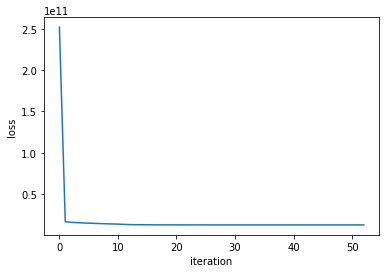

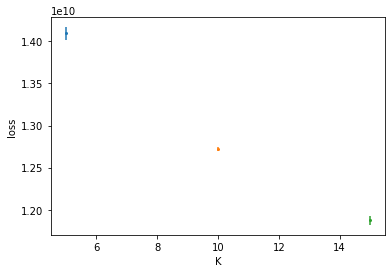

In [2]:
# CS 181, Spring 2020
# Homework 4

import numpy as np
import matplotlib.pyplot as plt


# This line loads the images for you. Don't change it!
pics = np.load("data/large_dataset.npy", allow_pickle=False)
pics=pics.astype('float64')
print(pics.shape)

# You are welcome to change anything below this line. This is just an example of how your code may look.
# Keep in mind you may add more public methods for things like the visualization.
# Also, you must cluster all of the images in the provided dataset, so your code should be fast enough to do that.

class KMeans(object):
    # K is the K in KMeans
    def __init__(self, K,useKMeansPP=False):
        self.K = K
        self.Niter=10000
        self.loss=np.nan*np.zeros(self.Niter)
        

    # X is a (N x 28 x 28) array where 28x28 is the dimensions of each of the N images.
    def fit(self, X):
        N=X.shape[0]
        dmax=np.max(pics)
        dmin=np.min(pics)
        
        mu=dmin+np.random.randn(self.K,28*28)*(dmax-dmin)
        #print("dmin,dmax",dmin,dmax,type(dmin),type(dmax))
        self.classes=np.nan*np.zeros([N])
        
        for it in range(self.Niter):
            if(it%100==1):
                print("it,loss:",it,self.loss[it-1])
                print(self.loss[it-1]-self.loss[it])
            if(it>1 and np.abs(self.loss[it-2]-self.loss[it-1])<1e-5 ):
                break
            loss=0
            munew=np.zeros([self.K,28*28])
            classcount=np.zeros(self.K)
            for idata in range(N):
                mindistance=99999999999
                minclass=-1
                for iclass in range(self.K):
                    #print("mu:",mu[iclass].shape,mu)
                    dist2center=np.sum((X[idata]-mu[iclass])**2)
                    #print("iclass0,distance:",iclass,dist2center)
                    if(dist2center<mindistance):
                        #print("hey")
                        mindistance=dist2center
                        #print("iclass:",iclass)
                        minclass=iclass
                        
                #print("minclass:",minclass)   
                self.classes[idata]=minclass
                loss+=mindistance
                
                classcount[minclass]+=1
                munew[minclass]+=X[idata]
                
            self.loss[it]=loss
            for iclass in range(self.K):
                #print(iclass,classcount[iclass])
                munew[iclass]=munew[iclass]/max(classcount[iclass],1)
                
                
            mu=np.copy(munew)
           
        self.mu=mu      
             
                
        

    # This should return the arrays for K images. Each image should represent the mean of each of the fitted clusters.
    def get_mean_images(self):
        pass

#q2.1
K = 10
KMeansClassifier = KMeans(K=10, useKMeansPP=False)
KMeansClassifier.fit(pics)
plt.figure()
plt.plot(KMeansClassifier.loss)
plt.xlabel('iteration')
plt.ylabel('loss')

##q2.2
K = 5
objfunc5=np.zeros(5)

for ntest in range(5):
    KMeansClassifier = KMeans(K=5, useKMeansPP=False)
    KMeansClassifier.fit(pics)
    objfunc5[ntest]=np.nanmin(KMeansClassifier.loss)

K = 10
objfunc10=np.zeros(5)

for ntest in range(5):
    KMeansClassifier = KMeans(K=10, useKMeansPP=False)
    KMeansClassifier.fit(pics)
    objfunc10[ntest]=np.nanmin(KMeansClassifier.loss)
    
K = 15
objfunc15=np.zeros(5)

for ntest in range(5):
    KMeansClassifier = KMeans(K=15, useKMeansPP=False)
    KMeansClassifier.fit(pics)
    objfunc15[ntest]=np.nanmin(KMeansClassifier.loss)


##q2.2
plt.figure()
plt.errorbar(5, np.mean(objfunc5), np.std(objfunc5), marker='o',markersize=2,label='K=5')
plt.errorbar(10, np.mean(objfunc10), np.std(objfunc10), marker='o',markersize=2,label='K=10')
plt.errorbar(15, np.mean(objfunc15), np.std(objfunc15), marker='o',markersize=2,label='K=10')
plt.xlabel('K')
plt.ylabel('loss')

##q2.3

In [11]:
np.mean(objfunc10)/5000

2543671.3398082433

it,loss: 1 258361687874.691
nan
it,loss: 1 269757728620.18463
nan
it,loss: 1 267712183057.63226
nan
2
5
8
11
14
17
20
23
26
29
1
4
7
10
13
16
19
22
25
28
3
6
9
12
15
18
21
24
27
30


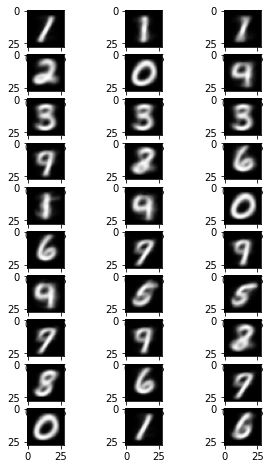

In [350]:
##q2.3
KMeansClassifier1 = KMeans(K=10, useKMeansPP=False)
KMeansClassifier1.fit(pics)
KMeansClassifier2 = KMeans(K=10, useKMeansPP=False)
KMeansClassifier2.fit(pics)
KMeansClassifier3 = KMeans(K=10, useKMeansPP=False)
KMeansClassifier3.fit(pics)
figure,ax=plt.subplots(figsize=(5,8))

for K in range(10):
    ax=plt.subplot(10,3,3*K+2)
    print(3*K+2)
    ax.imshow(KMeansClassifier2.mu[K].reshape(28,28), cmap='Greys_r')  
for K in range(10):
    ax=plt.subplot(10,3,3*K+1)
    print(3*K+1)
    ax.imshow(KMeansClassifier1.mu[K].reshape(28,28), cmap='Greys_r')  
for K in range(10):
    ax=plt.subplot(10,3,3*K+3)
    print(3*K+3)
    ax.imshow(KMeansClassifier3.mu[K].reshape(28,28), cmap='Greys_r') 

it,loss: 1 238645583840.69022
nan
it,loss: 1 235046974812.47693
nan
it,loss: 1 238713236300.62503
nan
2
5
8
11
14
17
20
23
26
29
1
4
7
10
13
16
19
22
25
28
3
6
9
12
15
18
21
24
27
30


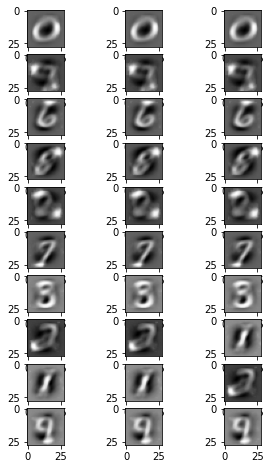

In [351]:
 ##q2.4
pics1=np.copy(pics)
pics1.dtype
for pixelid in range(28*28):
    mean=np.mean(pics1[:,pixelid])
    std=np.std(pics1[:,pixelid])
    if(std==0):
        std=1
    pics1[:,pixelid]=(pics1[:,pixelid]-mean)/std
    
    
KMeansClassifier1 = KMeans(K=10, useKMeansPP=False)
KMeansClassifier1.fit(pics1)
KMeansClassifier2 = KMeans(K=10, useKMeansPP=False)
KMeansClassifier2.fit(pics1)
KMeansClassifier3 = KMeans(K=10, useKMeansPP=False)
KMeansClassifier3.fit(pics1)
figure,ax=plt.subplots(figsize=(5,8))

for K in range(10):
    ax=plt.subplot(10,3,3*K+2)
    print(3*K+2)
    ax.imshow(KMeansClassifier2.mu[K].reshape(28,28), cmap='Greys_r')  
for K in range(10):
    ax=plt.subplot(10,3,3*K+1)
    print(3*K+1)
    ax.imshow(KMeansClassifier1.mu[K].reshape(28,28), cmap='Greys_r')  
for K in range(10):
    ax=plt.subplot(10,3,3*K+3)
    print(3*K+3)
    ax.imshow(KMeansClassifier3.mu[K].reshape(28,28), cmap='Greys_r') 


In [275]:
##q2.5
from scipy.spatial.distance import cdist as cdist
class HAC(object):
    def __init__(self, linkage):
        self.linkage = linkage
    
    def distance_matrix(self,samples):
        ##Creat a distance matrix between different samples
        Distance_mat= np.zeros((len(samples),len(samples)))
        for i in range(Distance_mat.shape[0]):
            for j in range(Distance_mat.shape[0]):
                if i!=j:
                    if i>j:
                        Distance_mat[i,j] = Distance_mat[j,i]
                    else:
                        Distance_mat[i,j] = float(self.get_dist(np.array(samples[i]),np.array(samples[j])))
                else:
                    Distance_mat[i,j] = 99999999999
        return Distance_mat
    
    
    

    
    def get_dist(self, x1, x2):
        
        
        size1, _1 = x1.shape
        size2, _2 = x2.shape
       
        if self.linkage in ['min','max']:
            #print("lenx1,lenx2:",size1,size2)                                  
            dist_btw_two = cdist(x1,x2)
            assert dist_btw_two.shape == (size1,size2)
            if self.linkage == 'min':
                return dist_btw_two.min()
            elif self.linkage == 'max':
                return dist_btw_two.max()
        elif self.linkage == 'cent':
            avg1 = np.average(x1,axis=0)
            avg2 = np.average(x2,axis=0)
            assert avg1.shape == avg2.shape
            return np.linalg.norm(avg1-avg2,ord=2)
        else:
            raise ValueError('wrong input for linkage')
        
    def fit(self, X, K):
        X = X.astype('float64')
        
        cur_clusters=len(X)
        list_clusters = []
        list_label = []
        for i in range(cur_clusters):
            list_clusters.append(np.array([X[i]]))
            list_label.append([i])
        recent_distance_list=[]
        merge_num=0
        merges_list=[]
        while (cur_clusters>K):
            merge_num+=1
            merges_list.append(merge_num)
            
            Distance_mat=self.distance_matrix(list_clusters)
            sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
            recent_distance_list.append(Distance_mat.min())
            #print("sample_ind_needed",sample_ind_needed)
            value_to_add      = list_clusters.pop(sample_ind_needed[1])
            list_clusters[sample_ind_needed[0]]=np.concatenate((list_clusters[sample_ind_needed[0]],value_to_add))
            
            list_label[sample_ind_needed[0]].extend(list_label[sample_ind_needed[1]])
            #list_label[sample_ind_needed[0]] = list_label[sample_ind_needed[0]]
            
            list_label.pop(sample_ind_needed[1])
           
            cur_clusters=len(list_clusters)
            #print("current clusters",cur_clusters)
        
        self.merges_list=merges_list
        self.recent_distance_list=recent_distance_list
        self.labels=list_label
        self.clusters=[]
        self.clusters_count={}
        for i in range(len(list_clusters)):
            #print("list:clusters",list_clusters)
            self.clusters.append(np.average(list_clusters[i],axis=0))
            self.clusters_count[i]=list_clusters[i].shape[0]
            

            
        
        
            
    



        
        

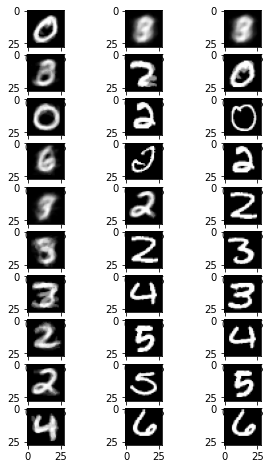

In [271]:
picsmall= np.load("data/small_dataset.npy", allow_pickle=False)
##q2.5
HACClassifier1 = HAC('max')
HACClassifier1.fit(picsmall,10)

HACClassifier2 = HAC('min')
HACClassifier2.fit(picsmall,10)
HACClassifier3 = HAC('cent')
HACClassifier3.fit(picsmall,10)

figure,ax=plt.subplots(figsize=(5,8))

for K in range(10):
    ax=plt.subplot(10,3,3*K+2)
    
    ax.imshow(HACClassifier2.clusters[K].reshape(28,28), cmap='Greys_r')  
for K in range(10):
    ax=plt.subplot(10,3,3*K+1)
    #print(3*K+1)
    ax.imshow(HACClassifier1.clusters[K].reshape(28,28), cmap='Greys_r')  
for K in range(10):
    ax=plt.subplot(10,3,3*K+3)
    #print(3*K+3)
    ax.imshow(HACClassifier3.clusters[K].reshape(28,28), cmap='Greys_r') 

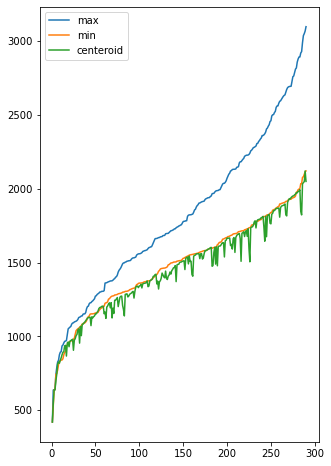

In [214]:
##q2_6

HACClassifier1_1 = HAC('max')
HACClassifier1_1.fit(picsmall,10)

HACClassifier2_1 = HAC('min')
HACClassifier2_1.fit(picsmall,10)
HACClassifier3_1 = HAC('cent')
HACClassifier3_1.fit(picsmall,10)

figure,ax=plt.subplots(figsize=(5,8))




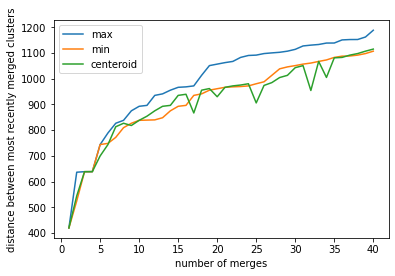

In [357]:
plt.plot(HACClassifier1_1.merges_list[0:40],HACClassifier1.recent_distance_list[0:40],label='max')
plt.plot(HACClassifier2_1.merges_list[0:40],HACClassifier2.recent_distance_list[0:40],label='min')
plt.plot(HACClassifier3_1.merges_list[0:40],HACClassifier3.recent_distance_list[0:40],label='centeroid')
plt.xlabel('number of merges')
plt.ylabel('distance between most recently merged clusters')
plt.legend()

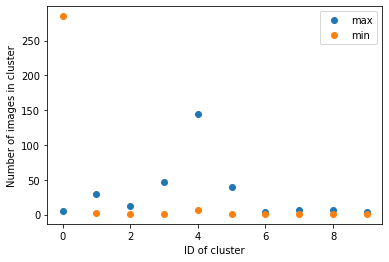

In [358]:
##q2_7
plt.plot(list(HACClassifier1.clusters_count.keys()),list(HACClassifier1.clusters_count.values()),'o',label='max')
plt.plot(list(HACClassifier2.clusters_count.keys()),list(HACClassifier2.clusters_count.values()),'o',label='min')
plt.xlabel('ID of cluster')
plt.ylabel('Number of images in cluster')
plt.legend()

In [352]:
##q2_8
picsmall=picsmall.astype('float64')

def classifylabel(labelslist,X):
    labels=np.nan*np.zeros(X.shape[0])
    classid=0
    for listk in labelslist:
        for idx in listk:
            #print(labels)
            #print(classid)
            labels[idx]=classid
        classid+=1
    return labels
idclassmax=classifylabel(HACClassifier1.labels,picsmall)
idclassmin=classifylabel(HACClassifier2.labels,picsmall)
idclasscent=classifylabel(HACClassifier3.labels,picsmall)

KMeansClassifiersmall = KMeans(K=10, useKMeansPP=False)
KMeansClassifiersmall.fit(picsmall)




it,loss: 1 15047434904.78596
nan


In [353]:
Xlabel=np.load("data/small_dataset_labels.npy", allow_pickle=False)
idclasskmeans=KMeansClassifiersmall.classes
def confusionmatrix(X,classid,K=10):
    #print(X.shape)
    N=len(X)
    confusionmatrix=np.zeros([K,K])
    #print(confusionmatrix.shape)
    for i in range(N):
        #print(classid[i],X[i])
        confusionmatrix[int(classid[i])][int(X[i])]+=1
    return confusionmatrix

conf_max=confusionmatrix(Xlabel,idclassmax)
conf_min=confusionmatrix(Xlabel,idclassmin)
conf_cent=confusionmatrix(Xlabel,idclasscent)
conf_kmeans=confusionmatrix(Xlabel,idclasskmeans)

(10, 10) (10, 10)


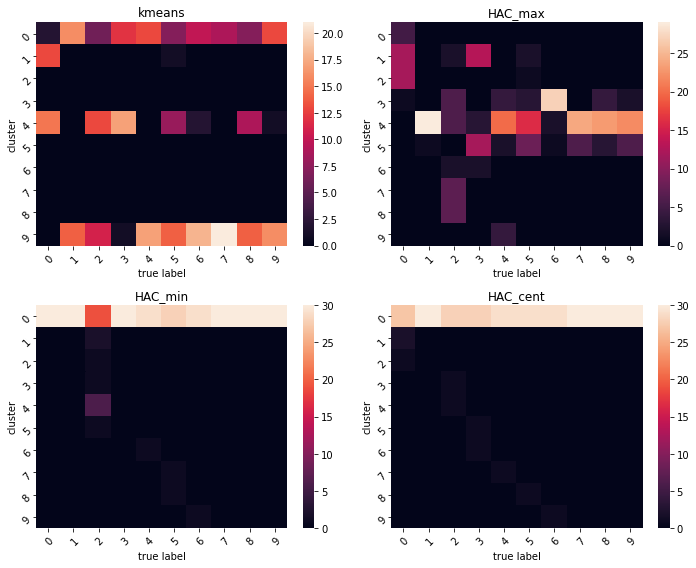

In [360]:
import seaborn as sns
y, x = np.mgrid[0:10, 0:10]
print(y.shape,x.shape)

fig, axs = plt.subplots(2, 2,figsize=(10,8))
ax = axs[0,0]
#c = ax.imshow(x, y, stateerrors_train)
sns.heatmap(conf_kmeans,ax=ax)
ax.set_title('kmeans')
ax.set_ylabel('cluster')
ax.set_xlabel('true label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
#fig.colorbar(c, ax=ax)

ax = axs[1,0]
sns.heatmap(conf_min,ax=ax)
ax.set_title('HAC_min')
ax.set_ylabel('cluster')
ax.set_xlabel('true label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax = axs[0,1]
sns.heatmap(conf_max,ax=ax)
ax.set_title('HAC_max')
ax.set_ylabel('cluster')
ax.set_xlabel('true label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax = axs[1,1]
sns.heatmap(conf_cent,ax=ax)
ax.set_title('HAC_cent')
ax.set_ylabel('cluster')
ax.set_xlabel('true label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig.tight_layout()
plt.show()